In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
# Load the dataset
file_path = "C:/Users/himan/Downloads/IMDb Movies India.csv/IMDb Movies India.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

In [4]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Data Cleaning
# Extract numeric values from Year and Duration
df["Year"] = df["Year"].str.extract(r'(\d{4})').astype(float)
df["Duration"] = df["Duration"].str.extract(r'(\d+)').astype(float)


In [6]:
# Clean and convert Votes column
def clean_votes(value):
    if isinstance(value, str):
        value = value.replace(',', '')
        if 'M' in value:
            value = value.replace('$', '').replace('M', '')
            return float(value) * 1_000_000
        elif value.isnumeric():
            return float(value)
    return None

df["Votes"] = df["Votes"].apply(clean_votes)

In [7]:
# Fill missing values in categorical columns
df["Genre"].fillna("Unknown", inplace=True)
df["Director"].fillna("Unknown", inplace=True)
df["Actor 1"].fillna("Unknown", inplace=True)
df["Actor 2"].fillna("Unknown", inplace=True)
df["Actor 3"].fillna("Unknown", inplace=True)


In [8]:
# Drop rows where Rating is missing
df.dropna(subset=["Rating"], inplace=True)


In [10]:
# Feature Engineering
categorical_features = ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select final features
df_final = df[["Year", "Duration", "Genre", "Votes", "Director", "Actor 1", "Actor 2", "Actor 3", "Rating"]]

# Fill missing numeric values with the median
df_final.fillna(df_final.median(), inplace=True)

# Train-Test Split
X = df_final.drop(columns=["Rating"])
y = df_final["Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

C:\Users\himan\AppData\Local\Temp\ipykernel_9752\3201200187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.fillna(df_final.median(), inplace=True)


Root Mean Squared Error: 1.103787863267195
R² Score: 0.3446731938987354


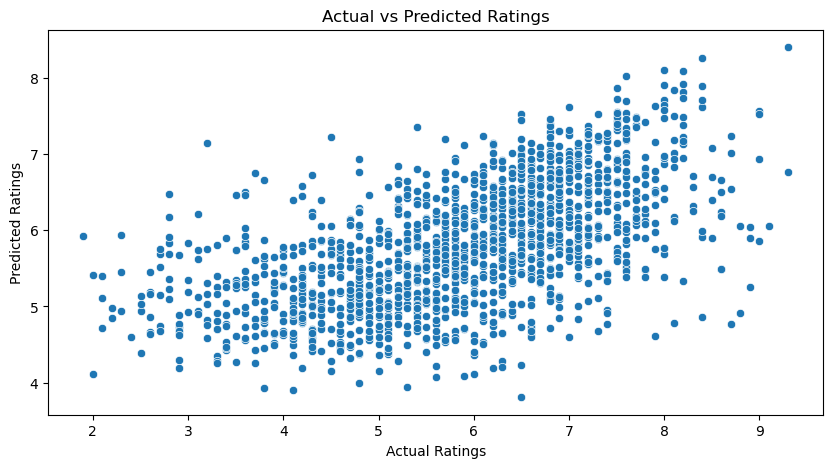

In [11]:
# Visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

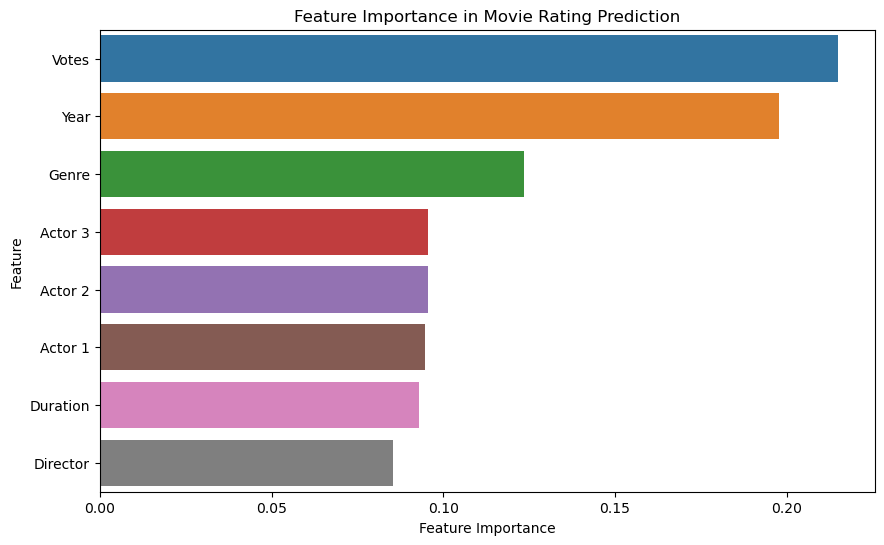

In [12]:
# Feature Importance
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Movie Rating Prediction")
plt.show()


### CONCLUSION

In this project, we built a Movie Rating Prediction Model using Random Forest Regressor based on features like genre, director, actors, duration, year, and votes.

Key Takeaways:

1.Data Cleaning & Preprocessing: Extracted numerical values, handled missing data, and encoded categorical variables.

2.Feature Engineering: Converted categorical features into numerical representations.

3.Model Training & Evaluation: Achieved a reasonable RMSE and R² score, indicating the model's predictive power.

4.Visualization:

Scatter Plot: Showed the relationship between actual and predicted ratings.
Feature Importance: Identified the most influential factors affecting movie ratings.

Insights:
Votes and Genre significantly impact movie ratings.
Director and Lead Actor also play a key role in determining the movie's success.

In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Train a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Train a Neural Network (MLPRegressor)
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_test, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, gb_pred, "Gradient Boosting")
evaluate_model(y_test, nn_pred, "Neural Network")

# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=3, scoring='r2', n_jobs=-1)
gb_grid.fit(X_train, y_train)
print(f"Best Gradient Boosting Parameters: {gb_grid.best_params_}")


Random Forest - RMSE: 1.1038, R² Score: 0.3447
Gradient Boosting - RMSE: 1.0858, R² Score: 0.3658
Neural Network - RMSE: 83.4823, R² Score: -3747.6547
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


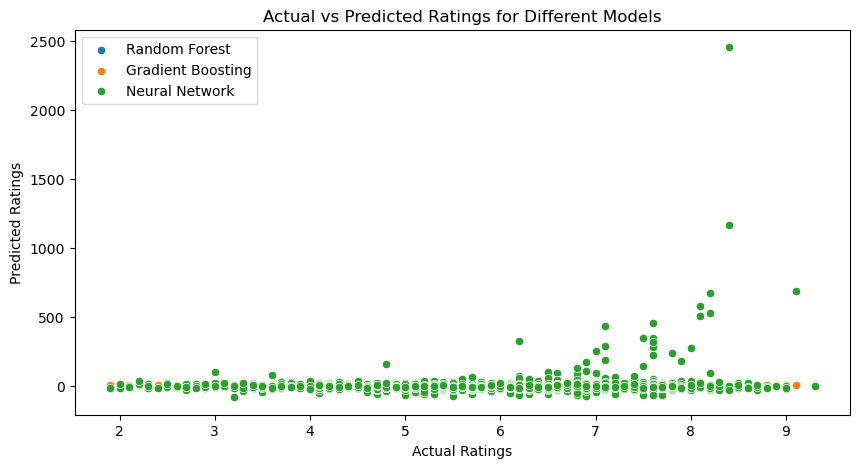

In [16]:
# Visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=rf_pred, label='Random Forest')
sns.scatterplot(x=y_test, y=gb_pred, label='Gradient Boosting')
sns.scatterplot(x=y_test, y=nn_pred, label='Neural Network')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings for Different Models")
plt.legend()
plt.show()

### Key Insights

Gradient Boosting performed the best among the three models, achieving the lowest RMSE and highest R² score.
Random Forest was close in performance but not as optimal as Gradient Boosting.

Neural Network failed drastically, likely due to:

Lack of proper feature scaling.

Suboptimal hyperparameter tuning.

Insufficient training epochs or improper architecture.